In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../vae_package')
import pandas as pd
import numpy as np
import torch
from vae_package import vae_model, vae_lstm_model, vocab, vae_tool, pack_global, analysis_mp, vae_util, vae_eval, vae_lstm_tool

ModuleNotFoundError: No module named 'vae_package'

In [2]:

from vae_package import vae_model, vae_lstm_model, vocab, vae_tool, pack_global, analysis_mp, vae_util, vae_eval, analysis
vo = vocab.Vocabulary(init_from_file='data/bongsung_tokens.txt')
smtk = vocab.SmilesTokenizer(vo)
rvae20 = vae_lstm_model.RNNVAE(vo, smtk, device='cpu', load_fn='data/250_lstm09.ckpt') #모델 불러올 때 device 옵션 설정 가능

rvae20.model.eval()
#Sampling관련 함수는 vae_tool.RNNVAESampler 에서 전부 import 
#batch_size는 내부에서 sampling 할 때만 쓰는거라 상관 없지만 너무 크면 메모리가 터져서 적당히 작은 값 사용

sampler = vae_tool.RNNVAESampler(rvae20, vo, batch_size=100) 

In [3]:
train_cell = ['HCT116_LARGE_INTESTINE',
                     'LOXIMVI_SKIN',
                     'K562_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE',
                     'MCF7_BREAST',
                     'CCRFCEM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE']

val_cell = ['EKVX_LUNG', 'SKMEL28_SKIN', 'SKOV3_OVARY', 'NCIH226_LUNG', 'OVCAR4_OVARY']
test_cell = ['TK10_KIDNEY', 'OVCAR5_OVARY', 'HOP92_LUNG', 'SKMEL2_SKIN', 'HS578T_BREAST']

In [4]:
import pickle

In [5]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn 
from torch.optim.lr_scheduler import LambdaLR
from einops import rearrange, repeat, reduce
from contextlib import contextmanager
from functools import partial
import math
import random
import os
from torch.autograd import Variable
import torch.nn.functional as F

from src.utils.original_dataset import *
from src.Transformer import *
from src.g2d_diffusion import *
from src.g2d_predictor import *

from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import seaborn as sns
from statannotations.Annotator import Annotator
import time

import logging
import datetime
from torch import autograd
from torch.autograd import Variable
import matplotlib.pyplot as plt

import numpy
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.utils import shuffle
import copy

nci_data = pd.read_csv("data/original_nci_drug_response_revised_1129.csv")
cell2mut = pd.read_csv("data/original_cell2mut.csv", index_col = 0).rename(columns={'index':'ccle_name'})
cell2cna = pd.read_csv("data/original_cell2cna.csv", index_col = 0).rename(columns={'index':'ccle_name'})
cell2cnd = pd.read_csv("data/original_cell2cnd.csv", index_col = 0).rename(columns={'index':'ccle_name'})
drug2smi = pd.read_csv("data/latent_nci_reconstructed_1129.csv").iloc[:, 0:-1]

In [6]:
NUM_GEN = 1000
BATCH_SIZE = 128

In [7]:
device='cuda:1'
PREDIFINED_GENOTYPES = ['mut', 'cna', 'cnd']
PREDICTOR = NCIPREDICTOR(num_of_genotypes = 3, num_of_dcls = 5, cond_dim = 128, drug_dim = 128,  device = device)



PREDICTOR.to(device).to(torch.float)



collate_fn = CandidateCollator(genotypes=PREDIFINED_GENOTYPES)

NeST neighbor info is used
Load pretrained cond_encoder ...


Decode Start
Decode End. Took 892.21 sec
(0.888, 0.5461711711711712, 0.9896907216494846, 0.8040482555182494, 17.79875192874227)
Decode Start
Decode End. Took 804.08 sec
(0.496, 1.0, 1.0, 0.8743057910459741, 14.264678406179222)
Decode Start
Decode End. Took 296.93 sec
(0.684, 1.0, 1.0, 0.883564895837096, 9.567706576979447)
Decode Start
Decode End. Took 281.04 sec
(0.967, 0.5449844881075491, 0.9981024667931688, 0.8364576864468206, 37.7948529730138)
Decode Start
Decode End. Took 287.07 sec
(0.978, 0.3670756646216769, 1.0, 0.7820363193138563, 41.50841332251515)
Decode Start
Decode End. Took 278.34 sec
(0.874, 0.5560640732265446, 0.9938271604938271, 0.8040795742887376, 17.068865511306505)
Decode Start
Decode End. Took 279.85 sec
(0.498, 1.0, 1.0, 0.8750263662916996, 14.516256463436356)
Decode Start
Decode End. Took 280.20 sec
(0.672, 1.0, 1.0, 0.8817378042629321, 10.322209027475097)
Decode Start
Decode End. Took 280.72 sec
(0.942, 0.6719745222929936, 1.0, 0.8629439244118374, 32.707518608280

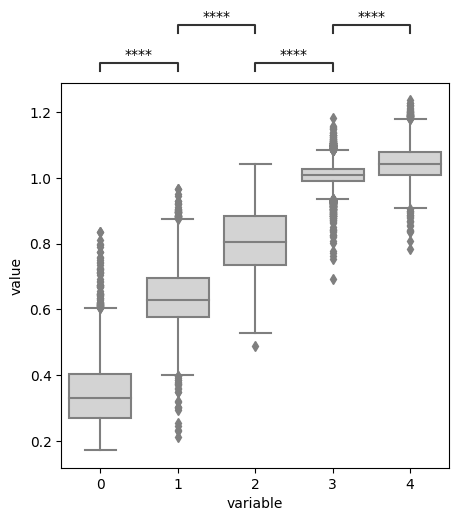

Decode Start
Decode End. Took 326.67 sec
(0.76, 0.6578947368421053, 1.0, 0.834540018569831, 52.403582122938246)
Decode Start
Decode End. Took 279.80 sec
(0.752, 0.8723404255319149, 0.9969512195121951, 0.8642878165196249, 16.491777159323632)
Decode Start
Decode End. Took 307.38 sec
(0.627, 1.0, 1.0, 0.8757321739768517, 14.549414041736263)
Decode Start
Decode End. Took 279.54 sec
(0.95, 0.9536842105263158, 0.9977924944812362, 0.9086600473729948, 22.42722492731962)
Decode Start
Decode End. Took 282.47 sec
(0.969, 0.41382868937048506, 1.0, 0.7852636356914715, 40.971975870892685)
Decode Start
Decode End. Took 280.88 sec
(0.855, 0.4631578947368421, 0.9949494949494949, 0.7346901714308361, 30.085476226186017)
Decode Start
Decode End. Took 280.81 sec
(0.698, 1.0, 0.998567335243553, 0.8755973482011385, 15.016523640559498)
Decode Start
Decode End. Took 280.66 sec
(0.683, 1.0, 1.0, 0.8790627367098489, 13.595410663295027)
Decode Start
Decode End. Took 281.76 sec
(0.91, 1.0, 1.0, 0.9036177913115877,

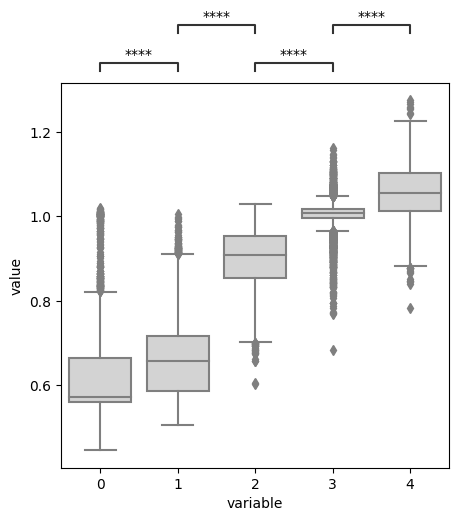

Decode Start
Decode End. Took 358.92 sec
(0.847, 0.6328217237308147, 0.9906716417910447, 0.8144207184216102, 48.161052421320804)
Decode Start
Decode End. Took 281.77 sec
(0.656, 0.9984756097560976, 1.0, 0.8706548408950341, 17.183770891803285)
Decode Start
Decode End. Took 288.65 sec
(0.733, 1.0, 1.0, 0.874053713962224, 14.377158584021586)
Decode Start
Decode End. Took 280.26 sec
(0.962, 0.7079002079002079, 0.9970631424375918, 0.8657371350242034, 37.18926255528784)
Decode Start
Decode End. Took 280.64 sec
(0.972, 0.35802469135802467, 1.0, 0.732693196298587, 47.050129555959046)
Decode Start
Decode End. Took 280.59 sec
(0.901, 0.45394006659267483, 0.9926650366748166, 0.7921602139675264, 51.431333481706886)
Decode Start
Decode End. Took 280.05 sec
(0.735, 0.9333333333333333, 0.9956268221574344, 0.8688378341329827, 15.818609566034254)
Decode Start
Decode End. Took 279.79 sec
(0.658, 1.0, 1.0, 0.8778605308418106, 15.076524424193302)
Decode Start
Decode End. Took 280.11 sec
(0.921, 0.99457111

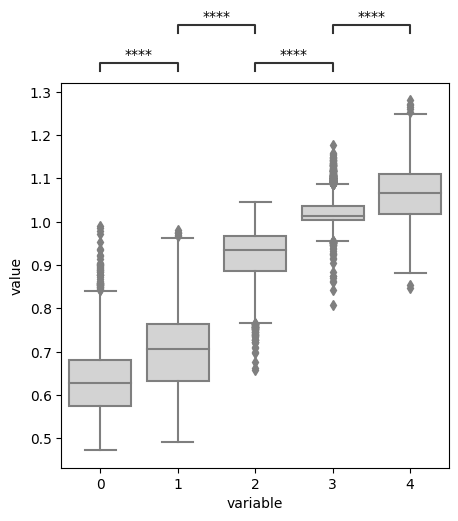

Decode Start
Decode End. Took 281.45 sec
(0.885, 0.5005649717514125, 0.9887133182844243, 0.7865309474807257, 18.955004932810255)
Decode Start
Decode End. Took 280.72 sec
(0.437, 1.0, 1.0, 0.8726454260732704, 15.51205714146797)
Decode Start
Decode End. Took 280.93 sec
(0.646, 1.0, 1.0, 0.8799857151866951, 10.377158003104206)
Decode Start
Decode End. Took 277.04 sec
(0.965, 0.45595854922279794, 1.0, 0.8087016229261526, 40.566393572881175)
Decode Start
Decode End. Took 279.67 sec
(0.98, 0.29183673469387755, 0.9965034965034965, 0.749683808231348, 43.361235420703274)
Decode Start
Decode End. Took 279.53 sec
(0.901, 0.5271920088790233, 0.9978947368421053, 0.7951957030462575, 18.225775320238753)
Decode Start
Decode End. Took 277.24 sec
(0.471, 1.0, 1.0, 0.8702010300361921, 15.11067012454437)
Decode Start
Decode End. Took 280.95 sec
(0.602, 1.0, 1.0, 0.8787518096799009, 11.202111853408454)
Decode Start
Decode End. Took 278.81 sec
(0.95, 0.5757894736842105, 0.9963436928702011, 0.838806151866207

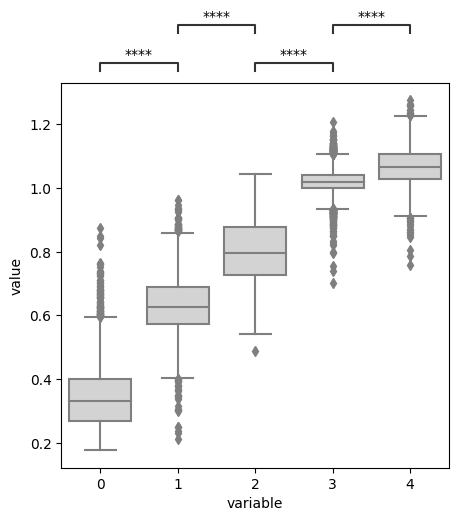

Decode Start
Decode End. Took 280.63 sec
(0.767, 0.6179921773142112, 1.0, 0.8289332618201329, 52.81137977390904)
Decode Start
Decode End. Took 279.56 sec
(0.729, 0.8463648834019204, 0.9967585089141004, 0.8625724651166388, 16.990112266986976)
Decode Start
Decode End. Took 284.48 sec
(0.588, 1.0, 1.0, 0.8740899200851231, 15.265051941254427)
Decode Start
Decode End. Took 278.82 sec
(0.94, 0.8925531914893617, 0.9976162097735399, 0.9021863568103089, 25.42690671985332)
Decode Start
Decode End. Took 278.75 sec
(0.966, 0.33229813664596275, 1.0, 0.7406489888379151, 43.48980308292713)
Decode Start
Decode End. Took 278.53 sec
(0.875, 0.4502857142857143, 0.9949238578680203, 0.7294316481734642, 30.209169327278513)
Decode Start
Decode End. Took 280.08 sec
(0.66, 0.9984848484848485, 0.9984825493171472, 0.8759329726507973, 15.242752175321172)
Decode Start
Decode End. Took 279.65 sec
(0.646, 1.0, 1.0, 0.878374821576447, 14.341587419962593)
Decode Start
Decode End. Took 278.86 sec
(0.923, 1.0, 1.0, 0.90

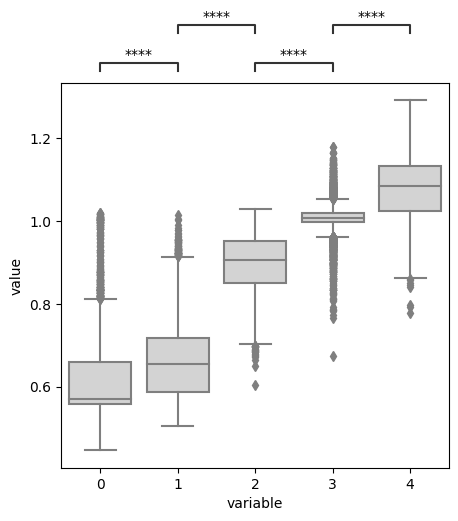

Decode Start
Decode End. Took 278.26 sec
(0.85, 0.5952941176470589, 0.9920948616600791, 0.8015897889722546, 49.20807147189742)
Decode Start
Decode End. Took 279.34 sec
(0.634, 0.998422712933754, 1.0, 0.8701098530255089, 17.385157028682578)
Decode Start
Decode End. Took 280.88 sec
(0.674, 1.0, 1.0, 0.8718457632339888, 16.254755952825306)
Decode Start
Decode End. Took 278.13 sec
(0.953, 0.6012591815320042, 0.9965095986038395, 0.8383472472866746, 41.446421458770764)
Decode Start
Decode End. Took 278.49 sec
(0.98, 0.2795918367346939, 0.9963503649635036, 0.6778645762877107, 49.93634956007)
Decode Start
Decode End. Took 276.47 sec
(0.909, 0.4389438943894389, 0.9949874686716792, 0.791840832569233, 51.173930576813135)
Decode Start
Decode End. Took 280.24 sec
(0.724, 0.899171270718232, 0.9953917050691244, 0.865718300091874, 16.667440948733315)
Decode Start
Decode End. Took 277.76 sec
(0.592, 1.0, 1.0, 0.876120135299326, 16.162617555119397)
Decode Start
Decode End. Took 278.24 sec
(0.923, 0.9848

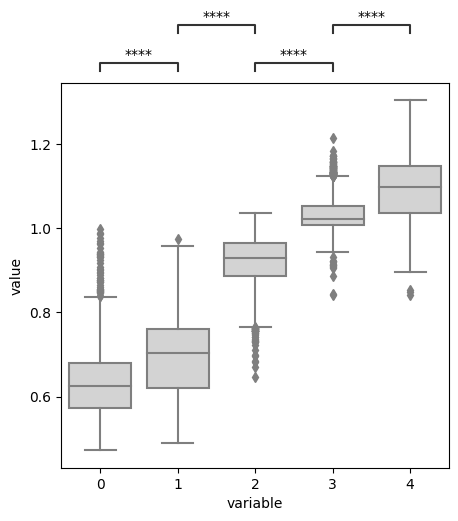

In [8]:
performance_dict = {}

for cfgw in [10, 11]:
    data_list = [train_cell, val_cell, test_cell]
    for data_id, data in enumerate(data_list):
        basic_perfom = {}
        generation_df = pd.DataFrame(columns =['ccle_name', 'NSC', 'SMILES', 'auc'])
        with open("generation_results//pobj_generated_vectors_"+str(cfgw)+"_"+str(data_id)+".pkl", "rb") as f:
            gen_dicts = pickle.load(f)
        data_df = pd.DataFrame(columns = nci_data.columns)
        drug_df = pd.DataFrame(columns = drug2smi.columns)
    
    
    
        auc_dict = {0:0.3, 1:0.5, 2:0.7, 3:0.9, 4:1.1}
    
        for key in gen_dicts.keys():
            cell_name, i = key
            print("Decode Start")
            start = time.time()
            return_smiles = sampler.gen_to_smiles(sampler.sample_from_z(gen_dicts[key], method='greedy').detach().cpu().numpy())
            end = time.time()
            print(f"Decode End. Took {end - start:.2f} sec")
    
            
            vacans, invids = analysis_mp.get_valid_canons(return_smiles)
            all_index = np.arange(0, NUM_GEN, 1)
            valid_vec = gen_dicts[key][~np.isin(all_index, invids)]
            vld, unq, nvl = analysis_mp.evaluation_basic(len(return_smiles), vacans, drug2smi['canonical_smiles'].values)

            vacans_fps = analysis.get_fps_from_smilist(vacans)
            _simmat = analysis.calculate_simmat(vacans_fps, vacans_fps)
            div = analysis.internal_diversity(_simmat)
            _gt_set = nci_data[nci_data['ccle_name']==cell_name]
            gt_set_drugid = list(_gt_set[_gt_set['auc_label']==i]['drug'].unique())
            gt_set_drug_smiles = drug2smi[drug2smi['drug'].isin(gt_set_drugid)]['canonical_smiles'].values
            fcd = analysis.fcd_calculation(vacans, gt_set_drug_smiles)
    
            
            for j, smi in enumerate(vacans):
                generation_df.loc[len(generation_df)] = {'ccle_name':cell_name, 'NSC':cell_name+"_"+str(i)+"_"+str(j), 'SMILES':smi, 'auc':auc_dict[i]}
            
            basic_perfom[key] = (vld, unq, nvl, div, fcd)
            print((vld, unq, nvl, div, fcd))
    
            num_drugs = len(vacans)
            _drug_df = pd.DataFrame(columns = drug2smi.columns)[['drug', 'canonical_smiles']]
            _data_df = pd.DataFrame(columns = nci_data.columns)
            for j in range(num_drugs):
                _drug_df.loc[j] = (cell_name+"_"+str(i)+"_"+str(j), vacans[j])
                _data_df.loc[j] = (cell_name, cell_name+"_"+str(i)+"_"+str(j), auc_dict[i], i)
    
            feature_df = pd.DataFrame(valid_vec)
            _drug_df = pd.concat([_drug_df, feature_df], axis = 1)
            _drug_df.columns = _drug_df.columns.astype(str)
            data_df = pd.concat([data_df, _data_df], axis = 0)
            drug_df = pd.concat([drug_df, _drug_df], axis = 0)
            
        generation_df.to_csv("generation_results/diffusion_generation_"+str(cfgw)+"_"+str(data_id)+".csv", index=False)
        drug_df.to_csv("generation_results/diffusion_generation_drug_df"+str(cfgw)+"_"+str(data_id)+".csv", index=False)
            
        


In [9]:
result

,variable,value
0,0,0.595772
1,0,0.657328
2,0,0.580789
3,0,0.592035
4,0,0.691625
...,...,...
23619,4,1.150623
23620,4,1.169888
23621,4,1.214313
23622,4,1.123499


In [10]:
vsen

,0
0,0.595772
1,0.657328
2,0.580789
3,0.592035
4,0.691625
...,...
4335,0.661334
4336,0.628296
4337,0.629346
4338,0.759337


In [ ]:
pred_list

In [ ]:
for cfgw in [12]:
    data_list = [train_cell]
    for data_id, data in enumerate(data_list):
        
        

In [ ]:
gt_set_drug_smiles